## Carregar e Examinar o Dataset

Primeiro, vamos carregar os dados e dar uma olhada nas primeiras linhas para entender a estrutura do dataset.

- target = evento de destino de compra (0 não 1 sim).

In [6]:
import pandas as pd
import numpy as np
import pandas_summary as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:

# Carregar os dados
data = pd.read_csv('data/product.csv')

# Mostrar as primeiras linhas do dataset
print(data.head())


                           order_id                           user_id  \
0  cfcd208495d565ef66e7dff9f98764da  c81e728d9d4c2f636f067f89cc14862c   
1  c4ca4238a0b923820dcc509a6f75849b  eccbc87e4b5ce2fe28308fd9f2a7baf3   
2  c81e728d9d4c2f636f067f89cc14862c  eccbc87e4b5ce2fe28308fd9f2a7baf3   
3  eccbc87e4b5ce2fe28308fd9f2a7baf3  eccbc87e4b5ce2fe28308fd9f2a7baf3   
4  a87ff679a2f3e71d9181a67b7542122c  eccbc87e4b5ce2fe28308fd9f2a7baf3   

                            page_id           product site_version  \
0  6f4922f45568161a8cdf4ad2299f6d23          sneakers      desktop   
1  4e732ced3463d06de0ca9a15b6153677          sneakers      desktop   
2  5c45a86277b8bf17bff6011be5cfb1b9  sports_nutrition      desktop   
3  fb339ad311d50a229e497085aad219c7           company      desktop   
4  fb339ad311d50a229e497085aad219c7           company      desktop   

                  time         title  target  
0  2019-01-11 09:24:43  banner_click       0  
1  2019-01-09 09:38:51   banner_show       0  

## Limpeza de Dados

Identificar e tratar valores nulos ou inconsistentes, se houver.

In [8]:
# Tratar valores nulos (se necessário)
data = data.dropna()  # ou data.fillna(valor)

#Limpar colunas sem importancia
dataClean = data.drop(['order_id'], axis=1)


## Análise Exploratória
Analise de tipos de eventos

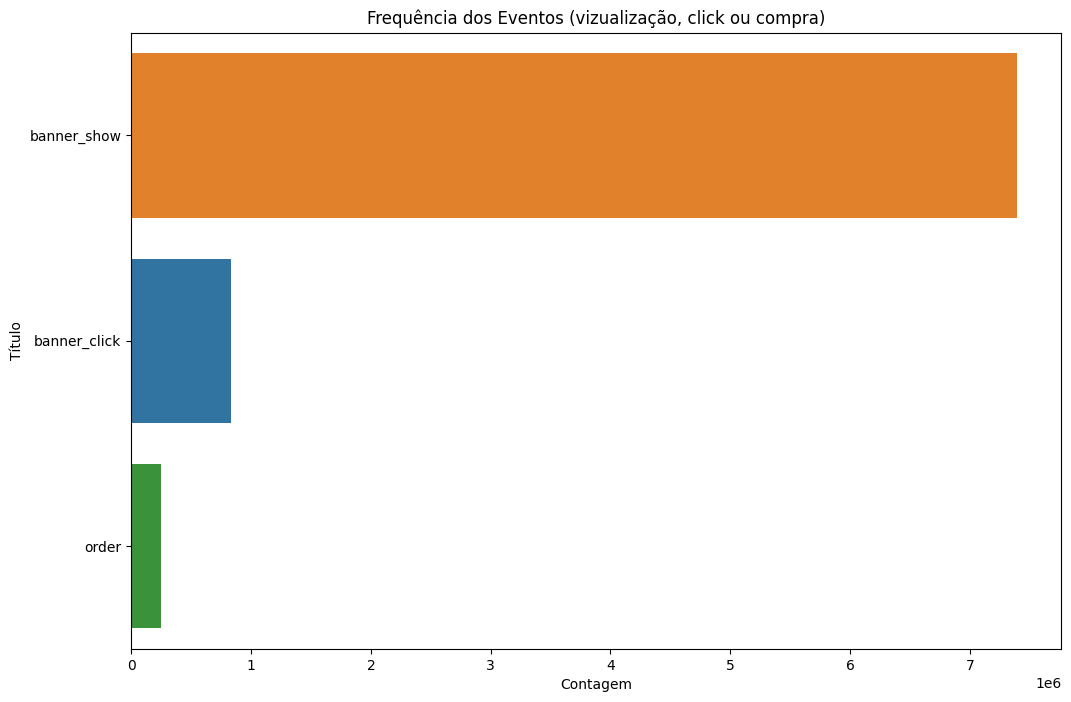

In [9]:
# Frequência de títulos
plt.figure(figsize=(12, 8))
sns.countplot(y='title',hue='title', data=dataClean, order=dataClean['title'].value_counts().index)
plt.title('Frequência dos Eventos (vizualização, click ou compra)')
plt.xlabel('Contagem')
plt.ylabel('Título')
plt.show()

In [10]:
def calculate_percentage(dataframe, feature):
    """
    Calcula a porcentagem de cada valor único em uma coluna específica do DataFrame.
    Retorna uma série Pandas contendo as porcentagens.
    """
    
    # Porcentagem de cada valor único
    percentage_unique_values = round(dataClean[feature].value_counts(sort=True, ascending=False) * 100 / dataframe.shape[0], 2)
    
    return percentage_unique_values

# Calcular a porcentagem para a coluna 'title'
percentage_title = calculate_percentage(dataClean, 'title')
print("Porcentagem de cada título:")
print(percentage_title)

Porcentagem de cada título:
title
banner_show     87.28
banner_click     9.79
order            2.94
Name: count, dtype: float64


Tendo em vista esses dados podemos ver o desempenho dos banners, e quanto eles converteram em cliques e quanto converteram em compras

#### Analise da váriavel target

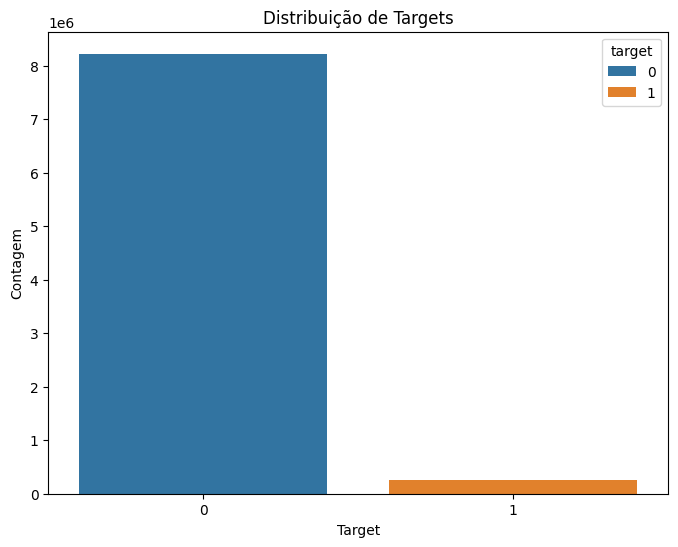

In [11]:
# Distribuição de targets (compras)
plt.figure(figsize=(8, 6))
sns.countplot(x='target', hue='target', data=dataClean)
plt.title('Distribuição de Targets')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.show()

In [12]:
dataClean.value_counts('target')

target
0    8222498
1     248722
Name: count, dtype: int64

Foi detectado uma grande disparidade dos dados com target 0 para 1, então será preciso fazer uma normalização dos dados

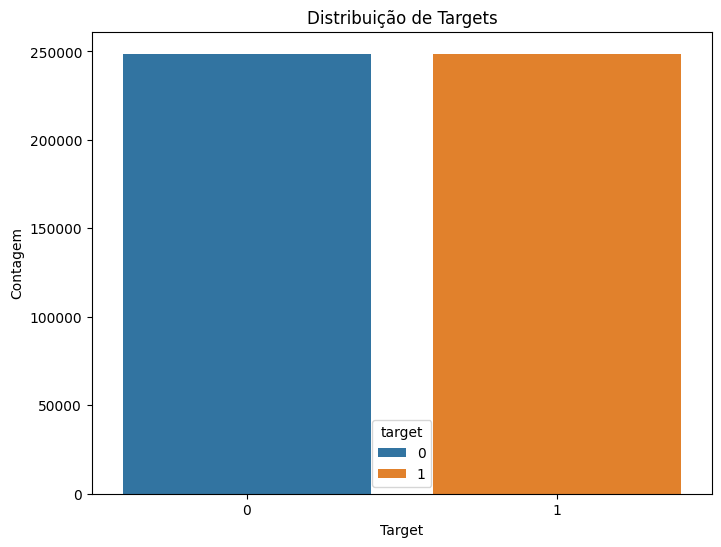

In [13]:
# Selecionando dados com target 1
number_records = len(dataClean[dataClean.target == 1])
indices = dataClean[dataClean.target == 1].index

# Separando dados com target 0
normal_indices = dataClean[dataClean.target == 0].index

# Selecionando valores aleatórios para o target 0 com base nos índices
random_normal_indices = normal_indices.to_numpy()
np.random.shuffle(random_normal_indices)
random_normal_indices = random_normal_indices[:number_records]

# Juntando os dados com target 0 e 1
under_sample_indices = np.concatenate([indices, random_normal_indices])

# Criando dataset dos dados normalizados
under_sample_data = dataClean.loc[under_sample_indices]


# Criar um novo DataFrame com os dados normalizados
data_normalized = under_sample_data.copy()


# Plotando o countplot usando Seaborn
plt.figure(figsize=(8, 6))
sns.countplot(x='target',hue='target', data=data_normalized)
plt.title('Distribuição de Targets')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.show()

In [14]:
data_normalized.value_counts('target')

target
0    248722
1    248722
Name: count, dtype: int64

Agora com os dados normalizados podemos seguir com a analize exploratória

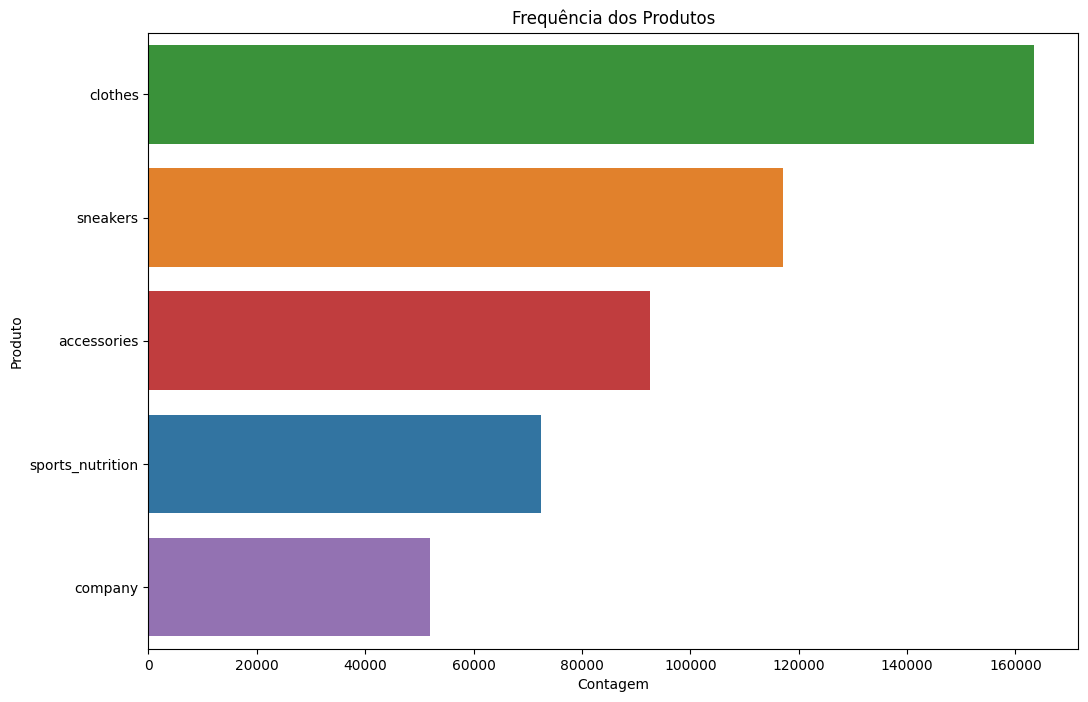

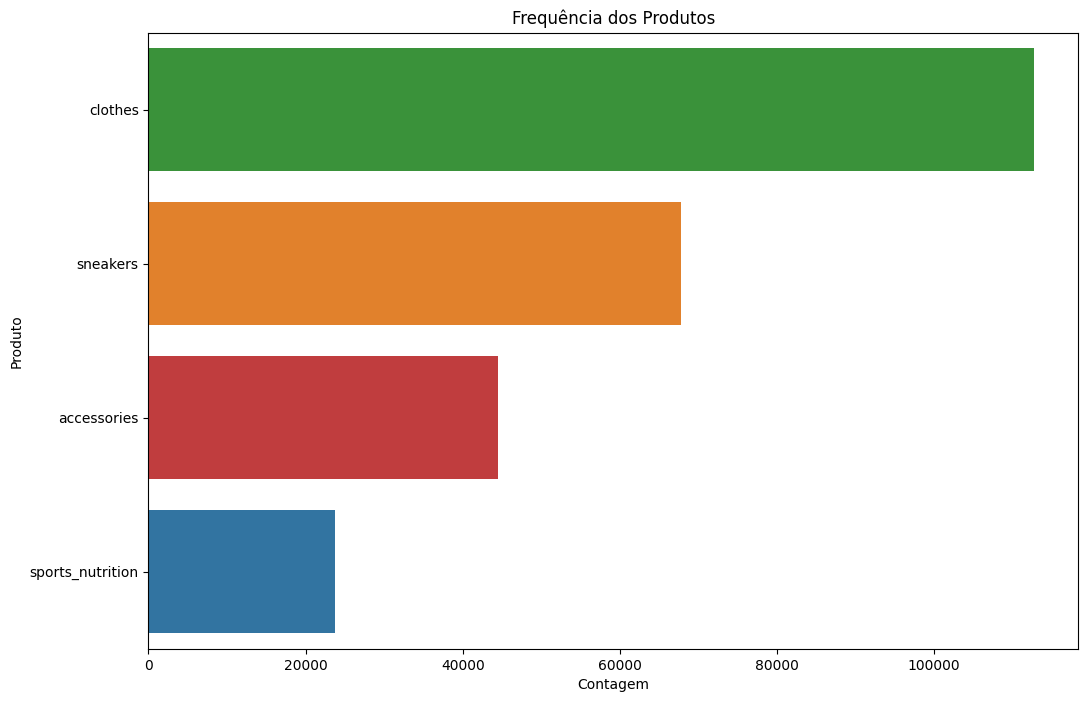

In [15]:
# Frequência de produtos
plt.figure(figsize=(12, 8))
sns.countplot(y='product',hue='product', data=data_normalized, order=data_normalized['product'].value_counts().index)
plt.title('Frequência dos Produtos')
plt.xlabel('Contagem')
plt.ylabel('Produto')
plt.show()


data_more_purchese = data_normalized[data_normalized['target'] == 1]
plt.figure(figsize=(12, 8))
sns.countplot(y='product',hue='product', data=data_more_purchese, order=data_more_purchese['product'].value_counts().index)
plt.title('Frequência dos Produtos')
plt.xlabel('Contagem')
plt.ylabel('Produto')
plt.show()



Podemos ter uma noção gráfica dos produtos mais procurados e comprados, onde mostra que company não está tendo vendas possibilitando uma decisão de investimento ou desinvestimento

### Análise com foco em dispositivos

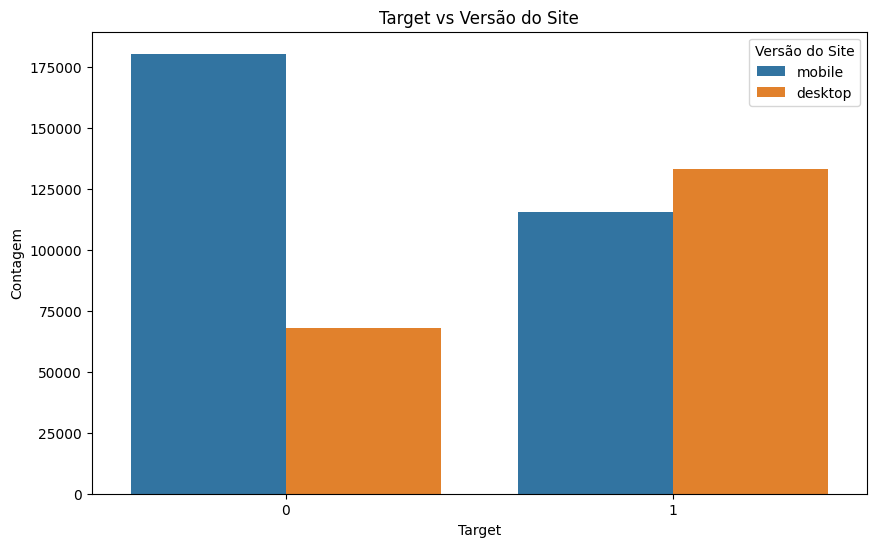

In [16]:
# Target vs Site Version
plt.figure(figsize=(10, 6))
sns.countplot(x='target', hue='site_version', data=data_normalized)
plt.title('Target vs Versão do Site')
plt.xlabel('Target')
plt.ylabel('Contagem')
plt.legend(title='Versão do Site')
plt.show()



Com esse gráfico pode ver que memso o site sendo mais vizualizado com dispositivos mobile, a maior quantidade de vendas é em dispositivos desktop. Significando maior intenção de compra nesse dispositivo. Podendo direcionar o invenstimento de marketing.

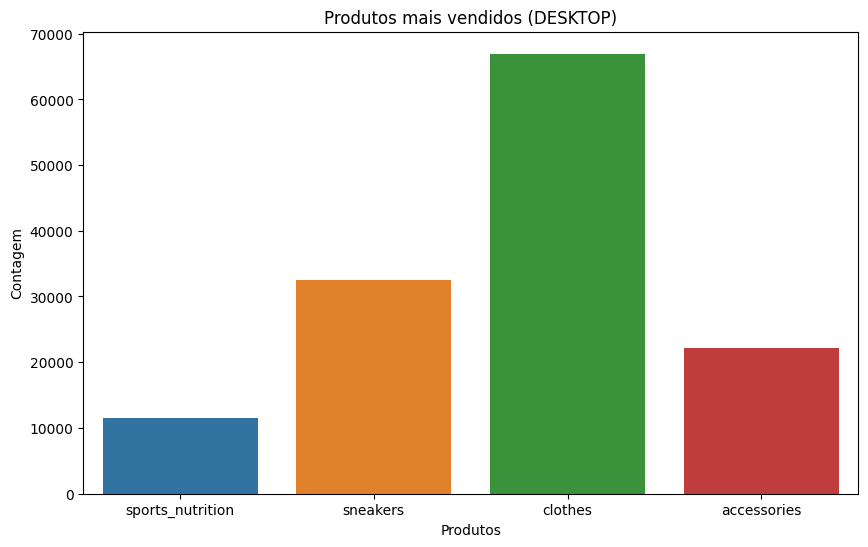

In [17]:
data_more_porchese_desktop = data_normalized[data_normalized['target'] == 1]
data_more_porchese_desktop = data_more_porchese_desktop[data_more_porchese_desktop['site_version'] == 'desktop']


# Produtos mais vendidos DESKTOP
plt.figure(figsize=(10, 6))
sns.countplot(x='product', hue='product', data=data_more_porchese_desktop)
plt.title('Produtos mais vendidos (DESKTOP)')
plt.xlabel('Produtos')
plt.ylabel('Contagem')
plt.show()

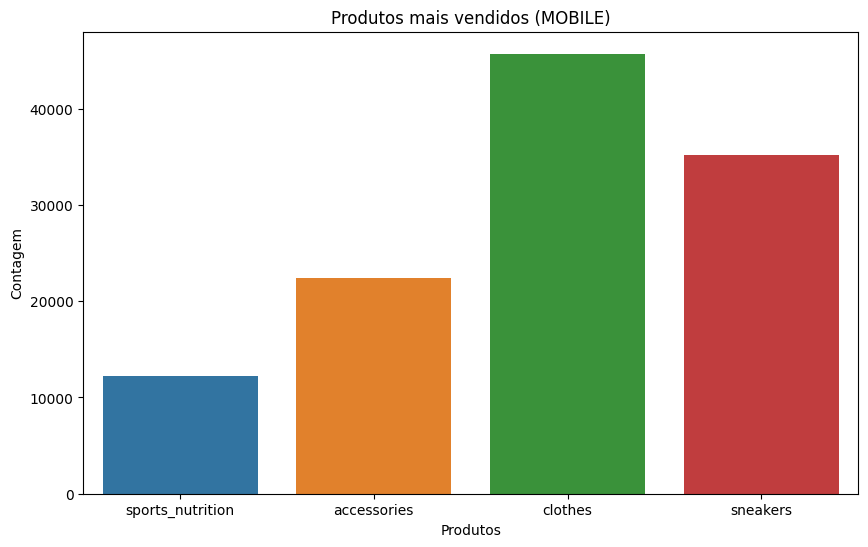

In [18]:
data_more_porchese_mobile = data_normalized[data_normalized['target'] == 1]
data_more_porchese_mobile = data_more_porchese_mobile[data_more_porchese_mobile['site_version'] == 'mobile']


# Produtos mais vendidos Mobile
plt.figure(figsize=(10, 6))
sns.countplot(x='product', hue='product', data=data_more_porchese_mobile)
plt.title('Produtos mais vendidos (MOBILE)')
plt.xlabel('Produtos')
plt.ylabel('Contagem')
plt.show()


#### Exploranto a variavel user_id

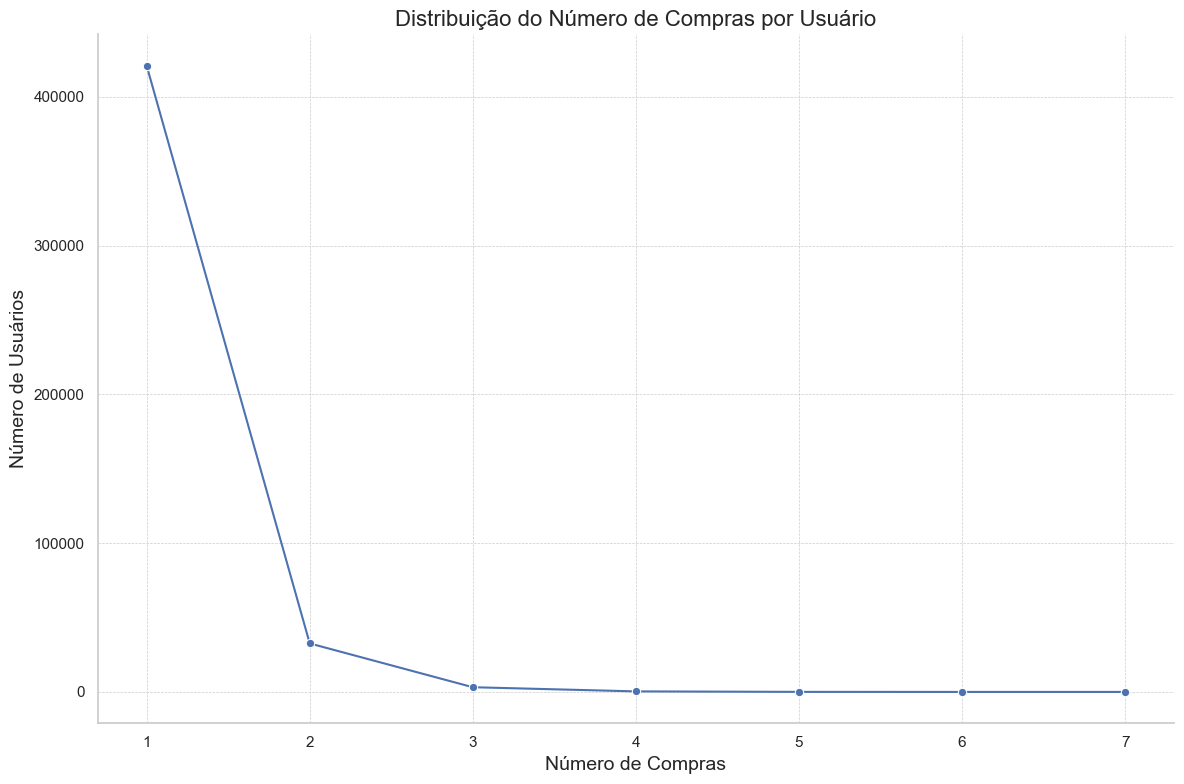

count
1    420890
2     32611
3      3177
4       372
5        50
6         7
7         3
Name: count, dtype: int64


In [29]:

# Contando o número de compras por usuário
purchase_counts = data_normalized['user_id'].value_counts()

# Contando quantos usuários compraram certa quantidade de vezes
purchase_distribution = purchase_counts.value_counts().sort_index()

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 8))

# Plotando o gráfico de linhas
sns.lineplot(data=purchase_distribution, marker='o', ax=ax)

# Adicionando rótulos e título
ax.set_title('Distribuição do Número de Compras por Usuário', fontsize=16)
ax.set_xlabel('Número de Compras', fontsize=14)
ax.set_ylabel('Número de Usuários', fontsize=14)

# Melhorando a visualização dos rótulos do eixo x
plt.xticks(ticks=purchase_distribution.index, labels=purchase_distribution.index, rotation=0)

# Adicionando gridlines
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Removendo o top e o right spines
sns.despine()

plt.tight_layout()
plt.show()

print(purchase_distribution)


Nessa vizualização podemos ter tirar a conclusão que a recompra precisa ser trabalhada, incentivar o cliente a voltar e comprar novamente no site 

## Definir Regras de Negócio
Com base na análise exploratória, podemos criar algumas regras de negócio, como:

- Promoções direcionadas: Oferecer promoções para produtos com menor taxa de conversão para determinadas plataformas.
- Marketing e Promoções personalizadas: Disparar cupons e promoções para incentivar clientes a voltar a comprar, com base no seu comportamento.
- Segmentação por plataforma: Adaptar estratégias de marketing para desktop e mobile com base no comportamento de compra dos usuários.

## Modelo de Machine Learning
Podemos criar um modelo para prever se um cliente realizará uma compra (target).

### Preparação dos Dados
Selecionar características relevantes e preparar os dados para o modelo

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
from category_encoders import TargetEncoder

# Codificar variáveis categóricas usando one-hot encoding para variáveis de baixa cardinalidade
X = pd.get_dummies(data_normalized[['product', 'site_version']])

# Adicionar a variável de alta cardinalidade para aplicar Target Encoding
X['user_id'] = data_normalized['user_id']
y = data_normalized['target']

# Aplicar Target Encoding à variável user_id
target_encoder = TargetEncoder()
X['user_id'] = target_encoder.fit_transform(X['user_id'], y)

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 5.2 Treinamento e Avaliação do Modelo
Vamos usar um modelo de Random Forest para a tarefa de classificação.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.9687704168300013
Matriz de Confusão:
 [[47312  2513]
 [  594 49070]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     49825
           1       0.95      0.99      0.97     49664

    accuracy                           0.97     99489
   macro avg       0.97      0.97      0.97     99489
weighted avg       0.97      0.97      0.97     99489

